In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torchvision
from tqdm.auto import tqdm

In [2]:
train_data=torchvision.datasets.FashionMNIST(
	root="Datasets",
	train=True,
	download=True,
	transform=torchvision.transforms.ToTensor(),
	target_transform=None
)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32,
                                          shuffle=True, num_workers=2)

In [3]:
test_data=torchvision.datasets.FashionMNIST(
	root="Datasets",
	train=False,
	download=True,
	transform=torchvision.transforms.ToTensor(),
	target_transform=None
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32,
                                          shuffle=True, num_workers=2)

In [4]:
image, label = train_data[0]

In [5]:
class_names = train_data.classes

In [6]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

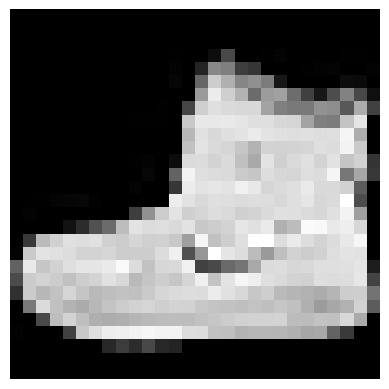

In [7]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)

In [8]:
class FashionModel(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
        )
    def forward(self,x):
        return self.layer_stack(x)

In [9]:
fashion_model = FashionModel(input_shape=784,hidden_units=32,output_shape=len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=fashion_model.parameters(), lr=0.01)

In [10]:
epochs = 5

In [11]:
for epoch in tqdm(range(epochs)):
    fashion_model.train()
    train_loss = 0
    for batch, (x,y) in enumerate(trainloader):   
        y_pred = fashion_model(x)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
train_loss /= len(trainloader)

  0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
train_loss

tensor(0.3927, grad_fn=<DivBackward0>)

In [13]:
test_loss = 0
fashion_model.eval()
with torch.inference_mode():
    for x,y in testloader:
        test_pred = fashion_model(x)
        test_loss += loss_fn(test_pred,y)
    test_loss/=len(testloader)

In [14]:
test_loss

tensor(0.4359)